# Modeling copper losses in a boost converter

This post will work through a simple power electronics problem.  An ideal boost converter uses only lossless components (L, C) and no lossy components (R).  However, real inductors will have nonzero resistance in its wiring.  This copper loss has a strong effect on the converter's ability to boost voltage.  This follows the approach of Chapter 3 of Fundamentals of Power Electronics, 2e by Erickson and Maksimović.

First let's draw the boost converter we'll be modeling.  Note that in this context, the precise switching circuit (PWM driver, MOSFET, etc) is irrelevant and represented by an ideal switch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SchemDraw as sd
import SchemDraw.elements as elm

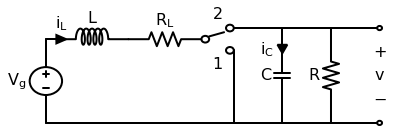

In [2]:
d = sd.Drawing()
V1 = d.add(elm.SOURCE_V, label='$V_g$')
d.add(elm.LINE, d='right', l=0.1*d.unit)
L1 = d.add(elm.INDUCTOR2, d='right', label='L', l=d.unit*0.75)
d.labelI_inline(L1, '$i_L$')

d.add(elm.RES, d='right', label='$R_L$', l=d.unit*0.75)
S1 = d.add(elm.SWITCH_SPDT2, d='right', anchor='a', toplabel='2', botlabel='1')

J1 = d.add(elm.LINE, d='right', xy=S1.b,  l=d.unit*.5)
J2 = d.add(elm.LINE, d='right', l=d.unit*.5)

d.add(elm.LINE, d='right', l=0.5*d.unit)
d.add(elm.DOT_OPEN)
d.add(elm.GAP, d='down', toy=V1.start, label=['+', '$v$', '$-$'])
d.add(elm.DOT_OPEN)

d.add(elm.LINE, d='down',toy=V1.start)
d.add(elm.LINE, to=V1.start)

d.add(elm.LINE, xy=S1.c, d='down', toy=V1.start)
C1 = d.add(elm.CAP, xy=J1.end, d='down', toy=V1.start, label='C')
d.add(elm.RES, xy=J2.end, d='down', toy=V1.start, label='R')
d.labelI_inline(C1, '$i_C$')

d.draw()

The physical inductor is represented here by a lumped element model consisting of an ideal inductor $L$ in series with a resistance $R_L$.  To analyze this circuit's behavior, we'll consider the circuit in each of the two switch positions (1 and 2) using three concepts:

- Inductor volt-second balance (applied to $v_L(t)$)
- Capacitor charge (amp-second) balance (applied to $i_C(t)$)
- Small ripple approximation


## Switch in Position 1

Here is the equivalent circuit when the switch is in position 1:

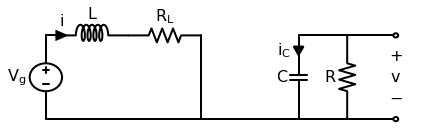

In [3]:
d = sd.Drawing()
V1 = d.add(elm.SOURCE_V, label='$V_g$')
d.add(elm.LINE, d='right', l=0.1*d.unit)
L1 = d.add(elm.INDUCTOR2, d='right', label='L', l=d.unit*0.75)
d.labelI_inline(L1, '$i$')

RL = d.add(elm.RES, d='right', label='$R_L$', l=d.unit*0.75)
d.add(elm.GAP, d='right')

J1 = d.add(elm.LINE, d='right', l=d.unit*.5)

d.add(elm.LINE, d='right', l=0.5*d.unit)
d.add(elm.DOT_OPEN)
d.add(elm.GAP, d='down', toy=V1.start, label=['+', '$v$', '$-$'])
d.add(elm.DOT_OPEN)

d.add(elm.LINE, d='down',toy=V1.start)
d.add(elm.LINE, to=V1.start)

d.add(elm.LINE, xy=RL.end, d='down', toy=V1.start)
C1 = d.add(elm.CAP, xy=J1.start, d='down', toy=V1.start, label='C')
d.add(elm.RES, xy=J1.end, d='down', toy=V1.start, label='R')
d.labelI_inline(C1, '$i_C$')

d.draw()

The waveforms of interest are the inductor voltage and capacitor current.  Using Kirchoff's laws:

$$ v_L(t) = V_g - i(t) R_L $$

$$ i_C(t) = -v(t) / R $$

Taking the small ripple approximation, we approximate the waveforms $v(t)$ and $i(t)$ with their DC components $V$ and $I$:

$$ v_L(t) \approx V_g - I R_L $$

$$ i_C(t) \approx -V / R $$


## Switch in Position 2

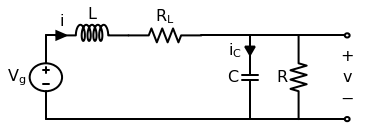

In [4]:
d = sd.Drawing()
V1 = d.add(elm.SOURCE_V, label='$V_g$')
d.add(elm.LINE, d='right', l=0.1*d.unit)
L1 = d.add(elm.INDUCTOR2, d='right', label='L', l=d.unit*0.75)
d.labelI_inline(L1, '$i$')

d.add(elm.RES, d='right', label='$R_L$', l=d.unit*0.75)

J1 = d.add(elm.LINE, d='right', l=d.unit*.5)
J2 = d.add(elm.LINE, d='right', l=d.unit*.5)

d.add(elm.LINE, d='right', l=0.5*d.unit)
d.add(elm.DOT_OPEN)
d.add(elm.GAP, d='down', toy=V1.start, label=['+', '$v$', '$-$'])
d.add(elm.DOT_OPEN)

d.add(elm.LINE, d='down',toy=V1.start)
d.add(elm.LINE, to=V1.start)

C1 = d.add(elm.CAP, xy=J1.end, d='down', toy=V1.start, label='C')
d.add(elm.RES, xy=J2.end, d='down', toy=V1.start, label='R')
d.labelI_inline(C1, '$i_C$')

d.draw()

As before, we apply Kirchoff's Laws and the small ripple approximation:

$$ v_L(t) = V_g - i(t) R_L - v(t) \approx V_g - I R_L - V $$

$$ i_C(t) = i(t) - v(t) / R \approx I - V/R $$

## Applying volt-second and charge balance

Let's define the switch to be in position 1 for the ON portion of a PWM signal with duty cycle $D$ and period $T_s$.  Then the full waveforms from $t=0$ to $t=T_s$ are defined by:

$$ v_L(t)=   \left\{
\begin{array}{ll}
      V_g - I R_L & t < D T_s \\
      V_g - I R_L - V & t > D T_s \\
\end{array}
\right.  $$

$$ i_C(t)=   \left\{
\begin{array}{ll}
      -V/R & t < D T_s \\
       I - V/R & t > D T_s \\
\end{array}
\right.  $$

At steady state, the time-integrated capacitor current $\langle i_c \rangle$ and inductor voltage $\langle v_L \rangle$ must equal zero (or else the component states would still be changing).  These conditions are called charge and volt-second balance because of the respective units.  Therefore at steady state we can set the average value integrals to zero (using $D' \equiv 1-D$):

$$\langle v_L(t) \rangle = \frac{1}{T_s} \int_0^{T_s} v_L(t) \, \mathrm{d}t$$

$$ = D(V_g - I R_L) + D'(V_g - I R_L - V) = 0$$

$$ V_g - I R_L - D'V = 0 $$

And similarly for $i_C(t)$:

$$ D'I - V/R = 0 $$

Using these two equations (from volt-second balance and charge balance), we can solve for the steady-state output voltage $V$ as a function of $D$:

$$ \frac{V}{V_g} = \frac{1}{D'} \frac{1}{1 + R_L / (D'^2 R)} $$

Written this way, it is clear that $R_L$ creates a limiting term on the ideal case $V/V_g=1/D'$.  The larger $R_L/R$ is, the smaller the maximum boost $V/V_g$ can be: 

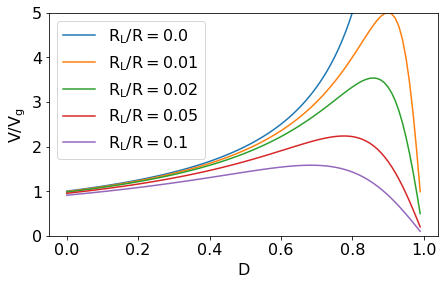

In [5]:
def calculate_voltage(D_prime, R_ratio):
    return 1 / (D_prime * (1+R_ratio/D_prime**2))

D = np.arange(0, 1, 0.01)
D_prime = 1 - D
for R_ratio in [0.0, 0.01, 0.02, 0.05, 0.1]:
    V_ratio = calculate_voltage(D_prime, R_ratio)
    plt.plot(D, V_ratio, label='$R_L/R={}$'.format(R_ratio))

plt.ylim(0, 5)
plt.legend()
plt.xlabel('$D$')
plt.ylabel('$V/V_g$')
plt.show()

## Constructing an equivalent circuit model

The strategy to construct an equivalent circuit is to treat the equations we derived for $\langle v_L(t) \rangle$ and $\langle i_C(t) \rangle$ as loop and node equations:

$$ V_g - I R_L - D'V = 0 $$

$$ D'I - V/R = 0 $$

$V_g$, $I R_L$, and $V/R$ are all straightforward to represent as circuit components, but what are $D'V$ and $D'I$?  We represent them as a "dependent voltage source" and "dependent current source", respectively.

First, let's do the voltage loop.  Note that because these equations include only the DC components of the waveforms, the equivalent circuit will be DC-only.  In other words, $\langle v_L(t) \rangle = 0$, so the inductor is a short circuit.


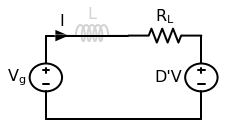

In [6]:
d = sd.Drawing()
V1 = d.add(elm.SOURCE_V, label='$V_g$')
d.add(elm.LINE, d='right', l=0.1*d.unit)
L1 = d.add(elm.INDUCTOR2, d='right', label='L', l=d.unit*0.75, color='lightgrey')
d.add(elm.LINE, endpts=[L1.start,L1.end])
R1 = d.add(elm.RES, d='right', label='$R_L$', l=d.unit*0.75)
d.labelI_inline(L1, '$I$')
d.add(elm.SOURCE_V, d='down', label="D'V", reverse=True)
d.add(elm.LINE, to=V1.start)

loop_circuit = sd.group_elements(d) # save for later
d.draw()

Now for the charge balance equation.  Because $\langle i_C(t) \rangle = 0$, the capacitor is an open circuit.

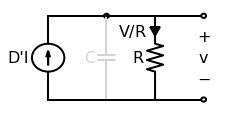

In [7]:
d = sd.Drawing()
V1 = d.add(elm.SOURCE_I, label="D'I")
d.add(elm.LINE, d='right', l=0.1*d.unit)

J1 = d.add(elm.LINE, d='right', l=d.unit*.5)
J2 = d.add(elm.LINE, d='right', l=d.unit*.5)

C1 = d.add(elm.CAP, xy=J1.end, d='down', toy=V1.start, label='C', color='lightgrey')
d.add(elm.DOT, xy=C1.start)

d.add(elm.LINE, d='right', l=d.unit)
d.add(elm.DOT_OPEN)
d.add(elm.GAP, d='down', toy=V1.start, label=['+', '$v$', '$-$'])
d.add(elm.DOT_OPEN)
d.add(elm.LINE, d='left', l=d.unit)

R1 = d.add(elm.RES, xy=J2.end, d='down', toy=V1.start, label='R')
d.labelI_inline(R1, '$V/R$')
d.add(elm.LINE, d='left', tox=V1.start)

node_circuit = sd.group_elements(d) # save for later
d.draw()

Now we need to combine the two equivalent circuits.  Drawing them side by side is revealing.

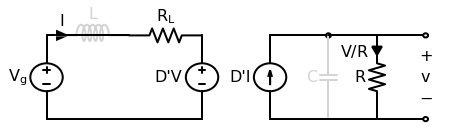

In [8]:
d = sd.Drawing()
d.add(loop_circuit)
d.add(node_circuit, xy=[2.3*d.unit,0])
d.draw()

The two dependent sources are linked:  the $D'V$ source depends on the voltage across the $D'I$ source, and the $D'I$ source depends on the current through the $D'V$ source.  This is essentially a "DC transformer" with ratio $D':1$.

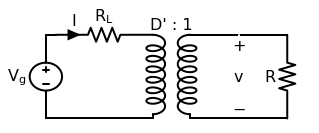

In [9]:
d = sd.Drawing()
V1 = d.add(elm.SOURCE_V, label="$V_g$")
d.add(elm.LINE, d='right', l=0.1*d.unit)
RL = d.add(elm.RES, d='right', label='$R_L$')
d.labelI_inline(RL, '$I$')
X1 = d.add(elm.transformer(t1=6, t2=6, loop=True, core=False), label="D' : 1", anchor='p1')
J1 = d.add(elm.LINE, xy=X1.s1, d='right', l=d.unit*.5)
J2 = d.add(elm.LINE, d='right', l=d.unit*.5)
d.add(elm.GAP, d='down', xy=J1.end, label=['+', '', '', '$v$', '', '', '$-$'])
R1 = d.add(elm.RES, xy=J2.end, d='down', toy=V1.start, label='R')
d.add(elm.LINE, d='left', tox=X1.s2)
d.add(elm.LINE, d='up', toy=X1.s2)
d.add(elm.LINE, xy=X1.p2, d='down', toy=V1.start)
d.add(elm.LINE, d='left', tox=V1.start)
d.draw()

This is an equivalent circuit for our boost converter with an ideal transformer and a loss resistor representing the inductor's winding resistance.

To solve for the output voltage, we push the voltage source and inductor resistance to the right side of the transformer:

$$V_g \rightarrow V_g / D'$$

$$R_L \rightarrow R_L/D'^2$$

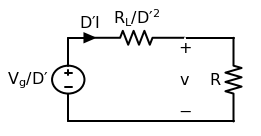

In [10]:
d = sd.Drawing()
V1 = d.add(elm.SOURCE_V, label="$V_g/D\prime$")
d.add(elm.LINE, d='right', l=0.2*d.unit)
R1 = d.add(elm.RES, d='right', label='$R_L/D\prime^2$')
d.labelI_inline(R1, '$D\prime I$', ofst=0.5)
J1 = d.add(elm.LINE, d='right', l=d.unit*.5)
d.add(elm.GAP, d='down', xy=J1.start, label=['+', '', '', '$v$', '', '', '$-$'])

R1 = d.add(elm.RES, xy=J1.end, d='down', label='$R$')
d.add(elm.LINE, to=V1.start)

d.draw()

The voltage divider formula, along with some manipulation, gives the same equation as before:

$$ \frac{V}{V_g} = \frac{1}{D'} \frac{1}{1 + R_L / (D'^2 R)} $$

This representation is useful for other things as well.  For instance, the load resistance could be pushed through the transformer to the left side to solve for the current on the primary side.  

We can also solve for the efficiency $\eta = P_{out} / P_{in}$:

$$P_{in} = V_g I$$

$$P_{out} = V D' I$$

$$\eta = \frac{V}{V_g} D'$$

Using the equation for $V/V_g$ from earlier, this gives:

$$\eta = \frac{1}{1 + R_L / (D'^2 R)}$$

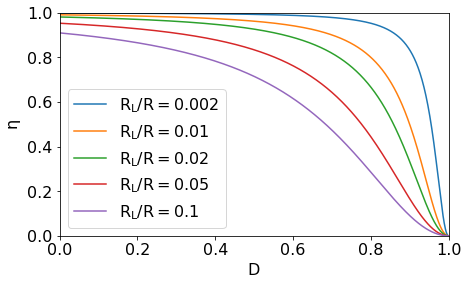

In [11]:
def calculate_efficiency(D_prime, R_ratio):
    return 1 / (1+R_ratio/D_prime**2)

D = np.arange(0, 1, 0.001)
D_prime = 1 - D
for R_ratio in [0.002, 0.01, 0.02, 0.05, 0.1]:
    eta = calculate_efficiency(D_prime, R_ratio)
    plt.plot(D, eta, label='$R_L/R={}$'.format(R_ratio))

plt.legend()
plt.xlabel('$D$')
plt.ylabel('$\eta$')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

## Summary

Applying volt-second balance and charge balance to the converter circuit gives two equations that can be viewed as the loop and node equations of equivalent circuit models.  These two equivalent circuits can be combined using an ideal DC transformer to get an overall equivalent circuit model that has a physical interpretation and is useful for analyzing the original converter circuit.